### *PhotoDissociation Region Toolbox Notebooks*
-------------------------------------------------------------

# Example 4: Exploring Models

This example shows use the PDRT Toolbox to look at individual models of ratio or intensity and optionally plot your observations on top. The main class for this is ModelPlot.


In [19]:
from pdrtpy.modelset import ModelSet
from pdrtpy.plot.modelplot import ModelPlot
from pdrtpy.measurement import Measurement
import pdrtpy.pdrutils as utils
from astropy.nddata import StdDevUncertainty
import astropy.units as u

In [20]:
from pdrtpy import version
if version()!='2.0.7-i':
    raise Exception("This notebook is for testing version pdrtpy 2.0.7-i. It will not work yet with other versions.")

### First, load up a set of models. Here we use the Wolfire/Kaufman 2006 models.

In [3]:
m = ModelSet(name="wk2006",z=1)
# Display all the available ratio and intensity model files.
m.table.show_in_notebook()

idx,numerator,denominator,ratio,filename,z,title
,,,,,,null
0,OI_145,OI_63,OI_145/OI_63,oioiweb,1.0,[O I] 145 $\mu$m / [O I] 63 $\mu$m
1,OI_145,CII_158,OI_145/CII_158,o145ciiweb,1.0,[O I] 145 $\mu$m / [C II] 158 $\mu$m
2,OI_63,CII_158,OI_63/CII_158,oicpweb,1.0,[O I] 63 $\mu$m / [C II] 158 $\mu$m
3,CII_158,CI_609,CII_158/CI_609,ciici609web,1.0,[C II] 158 $\mu$m / [C I] 609 $\mu$m
4,CI_370,CI_609,CI_370/CI_609,ciciweb,1.0,[C I] 370 $\mu$m / [C I] 609 $\mu$m
5,CII_158,CO_10,CII_158/CO_10,ciicoweb,1.0,[C II] 158 $\mu$m / CO(J=1-0)
6,CII_158,CO_32,CII_158/CO_32,ciico32web,1.0,[C II] 158 $\mu$m / CO(J=3-2)
7,CI_609,CO_10,CI_609/CO_10,cicoweb,1.0,[C I] 609 $\mu$m / CO(J=1-0)
8,CI_609,CO_21,CI_609/CO_21,cico21web,1.0,[C I] 609 $\mu$m / CO(J=2-1)


### Instantiate a ModelPlot class using the ModelSet you just created.

In [4]:
mp = ModelPlot(m)
help(ModelPlot)

Help on class ModelPlot in module pdrtpy.plot.modelplot:

class ModelPlot(pdrtpy.plot.plotbase.PlotBase)
 |  ModelPlot(modelset, figure=None, axis=None)
 |  
 |  Class to plot models and optionally Measurements.  It does not require :class:`~pdrtpy.tool.lineratiofit.LineRatioFit` first.
 |  The methods of this class can take a variety of optional keywords. See the doc for LineRatioPlot for a description of these keywords. @todo move doc someplace more useful
 |  
 |  Method resolution order:
 |      ModelPlot
 |      pdrtpy.plot.plotbase.PlotBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, modelset, figure=None, axis=None)
 |      Init method
 |      
 |      :param modelset: The set of models to use in these plots.
 |      :type modelset: `~pdrtpy.modelset.ModelSet`
 |  
 |  intensity(self, identifier, **kwargs)
 |      Plot a model ratio
 |      
 |      :param identifier: Identifier tag for the model to plot, e.g., "OI_63", "CII_158", "CO_10"]
 |  

##  Plot a particular model. You identify the model you want using the 'ratio' label in the table above

INFO: using the unit erg / (cm2 s sr) passed to the FITS reader instead of the unit erg s-1 cm-2 sr-1 in the FITS file. [astropy.nddata.ccddata]


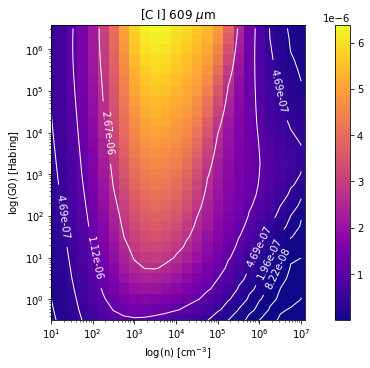

In [5]:
mp.plot("CI_609",legend=False,contours=True,label=True)

### Plot another one.  Add a few keywords for fancification.

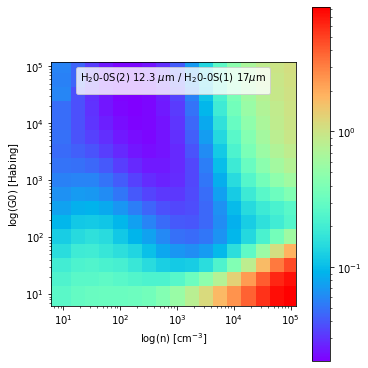

In [6]:
mp.plot("H200S2/H200S1",legend=True,cmap='rainbow',norm='log',contours=False)

### Get all the models that match CO(2-1), CO(4-3), and CI 609 micron and plot them. 
The `model_type` 'both' means get both ratios and intensities.  You could also ask for just 'ratio' or 'intensity'

INFO: using the unit erg / (cm2 s sr) passed to the FITS reader instead of the unit erg s-1 cm-2 sr-1 in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit erg / (cm2 s sr) passed to the FITS reader instead of the unit erg s-1 cm-2 sr-1 in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit erg / (cm2 s sr) passed to the FITS reader instead of the unit erg s-1 cm-2 sr-1 in the FITS file. [astropy.nddata.ccddata]
Found models:  dict_keys(['CI_609', 'CO_43', 'CO_21', 'CI_609/CO_21', 'CI_609/CO_43', 'CO_43/CO_21'])
INFO: using the unit erg / (cm2 s sr) passed to the FITS reader instead of the unit erg s-1 cm-2 sr-1 in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit erg / (cm2 s sr) passed to the FITS reader instead of the unit erg s-1 cm-2 sr-1 in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit erg / (cm2 s sr) passed to the FITS reader instead of the unit erg s-1 cm-2 sr-1 in the FITS file. [astropy.nddata.ccddata]


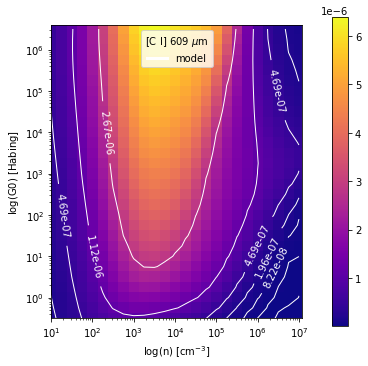

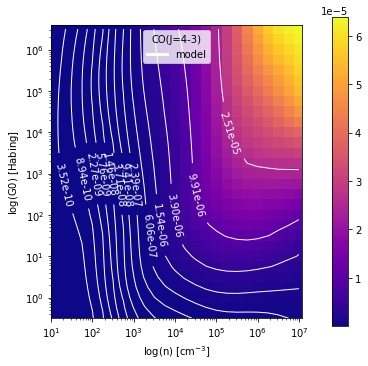

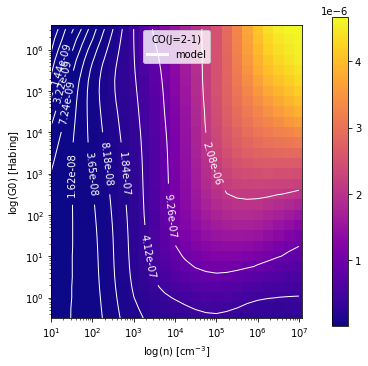

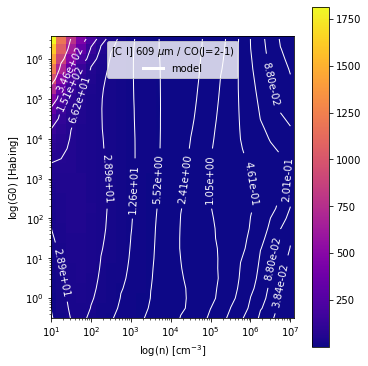

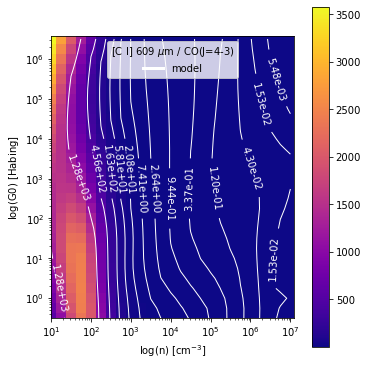

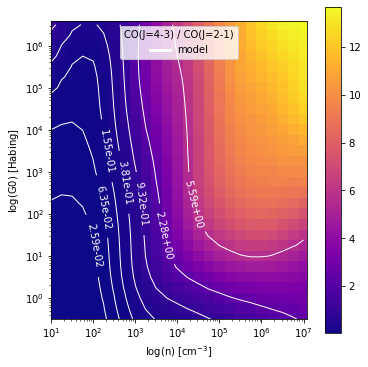

In [7]:
z=m.get_models(["CI_609","CO_21","CO_43"],model_type="both")
print("Found models: ",z.keys())
for j in z:
    mp.plot(j,label=True,norm='zscale')

### What if you want to plot observations on the models?
First create some Measurements to represent your observations.

In [8]:
myunit = "erg s-1 cm-2 sr-1"
mx=Measurement(data=[1.5E-6],uncertainty = StdDevUncertainty(0.5E-6),identifier="CI_609",unit=myunit)
my=Measurement(data=[2],uncertainty = StdDevUncertainty(1),identifier="CII_158/CI_609",unit=myunit)
mz=Measurement(data=[3E-6],uncertainty = StdDevUncertainty(0.5E-6),identifier="CII_158",unit=myunit)
mq=Measurement(data=[2.3],uncertainty=StdDevUncertainty(0.5),identifier='CO_43/CO_21')
a = [mx,my,mz,mq]

## The `overlay` method will plot one or more Measurements in the density-radiation field space.  
The errors are indicated with shading. Note you can pass it both ratios and intensities for the Measurements. The keywords `xlim` and `ylim` allow control of axis limits.

INFO: using the unit erg / (cm2 s sr) passed to the FITS reader instead of the unit erg s-1 cm-2 sr-1 in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit erg / (cm2 s sr) passed to the FITS reader instead of the unit erg s-1 cm-2 sr-1 in the FITS file. [astropy.nddata.ccddata]


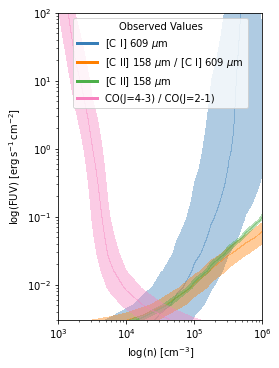

In [9]:
mp.overlay(measurements=a,yaxis_unit="erg s-1 cm-2",ylim=[3E-3,1E2],xlim=[1E3,1E6])

### You can overlay a observation on a model.
Simply pass a Measurement into the `plot` method.

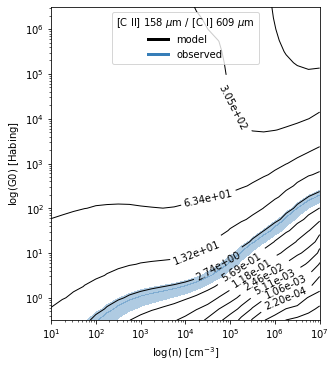

In [10]:
mp.plot("CII_158/CI_609",image=False,measurements=[my],legend=True,label=True)

### Don't like the default colors?  Use your own!

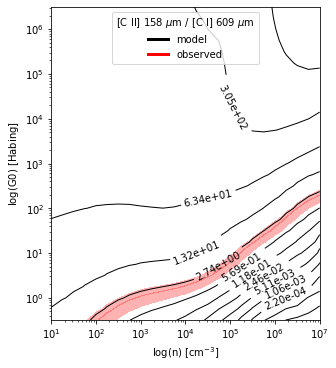

In [11]:
mp.plot("CII_158/CI_609",image=False,measurements=[my],legend=True,label=True,meas_color='red',shading=0.3)

### Here is an example plotting only intensities.
The code is smart enough to convert $K~km~s^{-1}$ to intensity units (as long as the Measurement has a RESTFREQ in the FITS header or given during creation) and change the legend label as appropriate.

INFO: using the unit erg / (cm2 s sr) passed to the FITS reader instead of the unit erg s-1 cm-2 sr-1 in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit erg / (cm2 s sr) passed to the FITS reader instead of the unit erg s-1 cm-2 sr-1 in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit erg / (cm2 s sr) passed to the FITS reader instead of the unit erg s-1 cm-2 sr-1 in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit erg / (cm2 s sr) passed to the FITS reader instead of the unit erg s-1 cm-2 sr-1 in the FITS file. [astropy.nddata.ccddata]
Converting K km/s to erg / (cm2 s sr) using Factor = +3.396E-07 g / (cm K s2)


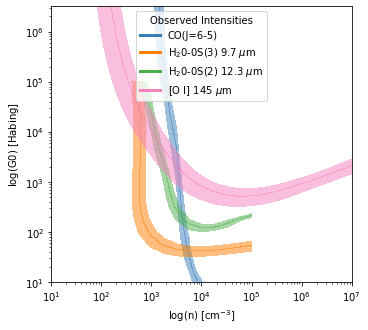

In [12]:
ma=Measurement(data=[0.75],uncertainty = StdDevUncertainty(0.3),identifier="CO_65",unit="K km s-1",restfreq=692*u.GHz)
mb=Measurement(data=[1E-6],uncertainty = StdDevUncertainty(0.25E-6),identifier="H200S3",unit=myunit)
mc=Measurement(data=[2E-6],uncertainty = StdDevUncertainty(0.5E-6),identifier="H200S2",unit=myunit)
md=Measurement(data=[1.25E-4],uncertainty = StdDevUncertainty(0.5E-4),identifier="OI_145",unit=myunit)
a = [ma,mb,mc,md]
mp.overlay(measurements=a,shading=0.5)

### Finally, plot them using Draine units on the Y-axis and with dashed lines indicating errors rather than shading.

INFO: using the unit erg / (cm2 s sr) passed to the FITS reader instead of the unit erg s-1 cm-2 sr-1 in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit erg / (cm2 s sr) passed to the FITS reader instead of the unit erg s-1 cm-2 sr-1 in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit erg / (cm2 s sr) passed to the FITS reader instead of the unit erg s-1 cm-2 sr-1 in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit erg / (cm2 s sr) passed to the FITS reader instead of the unit erg s-1 cm-2 sr-1 in the FITS file. [astropy.nddata.ccddata]
Converting K km/s to erg / (cm2 s sr) using Factor = +3.396E-07 g / (cm K s2)


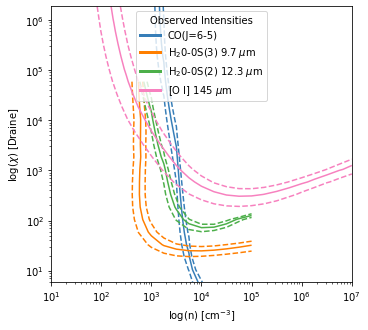

In [13]:
mp.overlay(measurements=a,yaxis_unit='Draine',shading=0)

## You can plot the phase space coverage of model intensities and ratios.
These show lines of constant density and radiation field as a function of line intensity or intensity ratio from the models. These can be useful for making predictions of line strength or estimating density and radiation field when you don't have enough lines to fit with the LineRatioFit tool. The <code>phasespace</code> method takes two identifier strings and plots the (density, radiation field) model phase space for those lines.  Below are 3 examples.

In [14]:
# Two ratios
identifiers1 = ["OI_63+CII_158/FIR","OI_63/CII_158"]
# Two intensities
identifiers2 = ["CO_21","OI_63"]
# An intensity and a ratio
identifiers3 = ["CO_65","CI_609/CO_43"]

### Use keywords to control the plots
The `reciprocal` keyword controls whether to invert a model ratio before plotting, one boolean per axis.  In this case, the model is stored as OI 63$\mu$m/CII 158$\mu$m but we want CII 158$\mu$m/OI 63$\mu$m, so we set the y-axis `reciprocal` value to `True`.  You can limit the range of $n$ and $G_0$ plotted with the `dens_clip` and `rad_clip` keywords, which take astropy Quantities as their values.  Figures can be saved in common formats with `savefig`. 

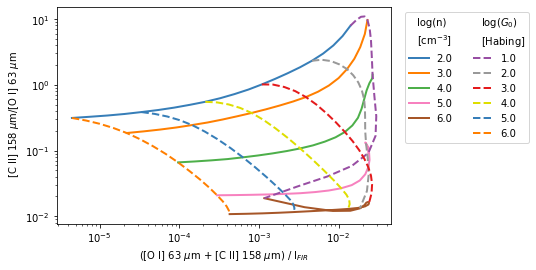

In [23]:
mp.phasespace(identifiers1,reciprocal=[False,True],dens_clip=[100,1E6]*u.Unit("cm-3"),rad_clip=[10,1E6]*utils.habing_unit,)
mp.savefig("CII_OI_FIR.png",bbox_inches='tight',transparent=False,facecolor='white')

### Model units are controlled by the clipping keywords.
In this example, setting the `rad_clip` Quantity units to erg s$^{-1}$ cm$^{-2}$ changes the units of the model radiation field.

INFO: using the unit erg / (cm2 s sr) passed to the FITS reader instead of the unit erg s-1 cm-2 sr-1 in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit erg / (cm2 s sr) passed to the FITS reader instead of the unit erg s-1 cm-2 sr-1 in the FITS file. [astropy.nddata.ccddata]


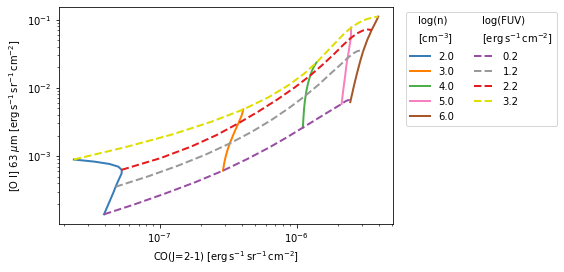

In [21]:
mp.phasespace(identifiers2,reciprocal=[False,False],dens_clip=[100,1E6]*u.Unit("cm-3"),rad_clip=[1,1E4]*utils._RFS_UNIT_)
mp.savefig("OI_CO21.png",bbox_inches='tight',facecolor='white')

### You can mix ratios and intensities in phase space plots.
Note here we also use Draine units for the radiation field.

INFO: using the unit erg / (cm2 s sr) passed to the FITS reader instead of the unit erg s-1 cm-2 sr-1 in the FITS file. [astropy.nddata.ccddata]


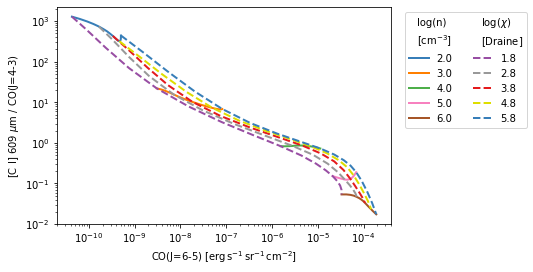

In [22]:
mp.phasespace(identifiers3,reciprocal=[False,False],dens_clip=[100,1E6]*u.Unit("cm-3"),rad_clip=[10,1E6]*utils.draine_unit)
mp.savefig("CI_CO.png",bbox_inches='tight',transparent=False,facecolor='white')